In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import seaborn as sns
import random
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#tf.compat.v1.set_random_seed(2021)

In [2]:
DATAPATH = '../input/english-handwritten-characters-dataset'
train_dir = pd.read_csv(DATAPATH + '/english.csv')
train_dir.shape

(3410, 2)

In [3]:
rand = random.sample(range(len(train_dir)), 300)
#Create validation set of data
validation_dir = pd.DataFrame(train_dir.iloc[rand,:].values, columns = ['image','label'])
#Drop Validation data from dataset
train_dir.drop(rand, inplace = True)
#Show Validation dataset
validation_dir

,image,label
0,Img/img021-034.png,K
1,Img/img056-008.png,t
2,Img/img006-038.png,5
3,Img/img022-029.png,L
4,Img/img027-018.png,Q
...,...,...
295,Img/img010-015.png,9
296,Img/img025-046.png,O
297,Img/img008-018.png,7
298,Img/img054-033.png,r


In [4]:
#Pick randomly 15 values
rand = random.sample(range(len(validation_dir)), 15)
#Create test set of data
test_dir = pd.DataFrame(validation_dir.iloc[rand,:].values, columns = ['image','label'])
#Drop Test data from validation set
validation_dir.drop(rand, inplace = True)
#Show Validation dataset
validation_dir

,image,label
0,Img/img021-034.png,K
1,Img/img056-008.png,t
2,Img/img006-038.png,5
3,Img/img022-029.png,L
4,Img/img027-018.png,Q
...,...,...
293,Img/img062-037.png,z
294,Img/img018-007.png,H
297,Img/img008-018.png,7
298,Img/img054-033.png,r


In [5]:
test_dir['4', 'd', 'Q', 'y', '7', '9', 'Z', 'A', 'c', 'G', 'L', 'Z', 'y', '5', '7']

,image,label
0,Img/img008-008.png,7
1,Img/img022-019.png,L
2,Img/img008-016.png,7
3,Img/img017-023.png,G
4,Img/img061-024.png,y
5,Img/img010-015.png,9
6,Img/img039-037.png,c
7,Img/img061-007.png,y
8,Img/img005-007.png,4
9,Img/img025-046.png,O


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe( 
                                            dataframe = train_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_dataframe( 
                                            dataframe = validation_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')


test_generator =  test2_datagen.flow_from_dataframe( 
                                            dataframe = test_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')


Found 3110 validated image filenames belonging to 62 classes.
Found 285 validated image filenames belonging to 62 classes.
Found 15 validated image filenames belonging to 13 classes.


In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(62, activation='sigmoid')  
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

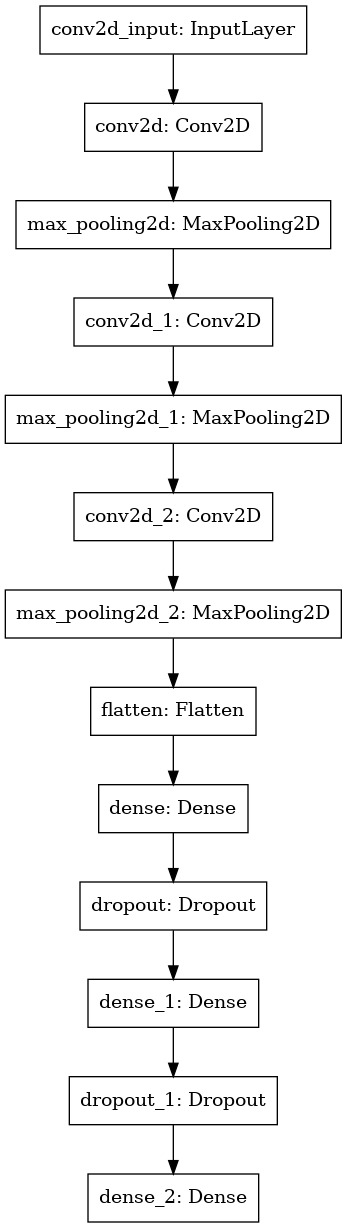

In [9]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [11]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=30)

Epoch 1/30
98/98 [==============================] - 66s 593ms/step - loss: 4.8618 - acc: 0.0483 - val_loss: 2.5730 - val_acc: 0.3614
Epoch 2/30
98/98 [==============================] - 45s 462ms/step - loss: 2.3290 - acc: 0.3896 - val_loss: 1.7914 - val_acc: 0.5298
Epoch 3/30
98/98 [==============================] - 46s 466ms/step - loss: 1.3054 - acc: 0.6351 - val_loss: 1.4191 - val_acc: 0.6281
Epoch 4/30
98/98 [==============================] - 47s 477ms/step - loss: 0.7175 - acc: 0.7930 - val_loss: 1.3726 - val_acc: 0.6561
Epoch 5/30
98/98 [==============================] - 49s 501ms/step - loss: 0.4079 - acc: 0.8815 - val_loss: 1.4872 - val_acc: 0.6491
Epoch 6/30
98/98 [==============================] - 50s 510ms/step - loss: 0.2920 - acc: 0.9045 - val_loss: 1.6206 - val_acc: 0.6351
Epoch 7/30
98/98 [==============================] - 47s 480ms/step - loss: 0.1881 - acc: 0.9449 - val_loss: 1.5536 - val_acc: 0.6561
Epoch 8/30
98/98 [==============================] - 48s 489ms/step - 

In [12]:
y_prob = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [13]:
cls = []
classes = list(train_generator.class_indices.keys())

In [14]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [15]:
cls

['A', '7', 'e', 'L', 'j', 'A', '7', 'a', 'G', '5', '9', 'y', 'y', 'Z', '2']

# INCEPTION V3

In [16]:
from tensorflow.keras.applications import InceptionV3

In [17]:
from tensorflow.keras import models, layers, optimizers
model_base = InceptionV3(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
InceptionV3_model = models.Model(inputs= model_base.input, outputs=predictions)

87916544/87910968 [==============================] - 2s 0us/step


In [19]:
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = InceptionV3_model.fit_generator(train_generator, epochs=30, shuffle=True, verbose=1, validation_data=validation_generator)

Epoch 1/30
98/98 [==============================] - 55s 489ms/step - loss: 0.4857 - acc: 0.9364 - val_loss: 0.8051 - val_acc: 0.8035
Epoch 2/30
98/98 [==============================] - 45s 461ms/step - loss: 0.4436 - acc: 0.9418 - val_loss: 0.7576 - val_acc: 0.8105
Epoch 3/30
98/98 [==============================] - 46s 466ms/step - loss: 0.4055 - acc: 0.9573 - val_loss: 0.7464 - val_acc: 0.7895
Epoch 4/30
98/98 [==============================] - 45s 458ms/step - loss: 0.3621 - acc: 0.9473 - val_loss: 0.7076 - val_acc: 0.8140
Epoch 5/30
98/98 [==============================] - 45s 462ms/step - loss: 0.3109 - acc: 0.9631 - val_loss: 0.6895 - val_acc: 0.8105
Epoch 6/30
98/98 [==============================] - 47s 481ms/step - loss: 0.3244 - acc: 0.9593 - val_loss: 0.6723 - val_acc: 0.8140
Epoch 7/30
98/98 [==============================] - 47s 479ms/step - loss: 0.2819 - acc: 0.9659 - val_loss: 0.6505 - val_acc: 0.8246
Epoch 8/30
98/98 [==============================] - 45s 459ms/step - 

In [20]:
y_prob =InceptionV3_model.predict(test_generator)

In [21]:
cls = []
classes = list(train_generator.class_indices.keys())

In [22]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])
   

In [23]:
cls

['4', 'y', 'A', 'G', '5', 'Z', '9', 'n', '7', 'c', 'o', 'y', 'f', 'Z', 'L']

# ResNet50-SGD

In [24]:
from tensorflow.keras.applications import ResNet50

In [25]:
model_base = ResNet50(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
Resnet50_model = models.Model(inputs= model_base.input, outputs=predictions)

94773248/94765736 [==============================] - 2s 0us/step


In [26]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=40, shuffle=True, verbose=1, validation_data=validation_generator)

Epoch 1/40
98/98 [==============================] - 53s 478ms/step - loss: 4.3673 - acc: 0.0229 - val_loss: 4.2647 - val_acc: 0.0070
Epoch 2/40
98/98 [==============================] - 46s 467ms/step - loss: 3.5775 - acc: 0.1662 - val_loss: 4.2556 - val_acc: 0.0211
Epoch 3/40
98/98 [==============================] - 46s 468ms/step - loss: 2.9517 - acc: 0.3982 - val_loss: 4.3382 - val_acc: 0.0175
Epoch 4/40
98/98 [==============================] - 47s 475ms/step - loss: 2.3764 - acc: 0.5668 - val_loss: 4.4359 - val_acc: 0.0175
Epoch 5/40
98/98 [==============================] - 47s 474ms/step - loss: 1.9078 - acc: 0.6892 - val_loss: 4.4992 - val_acc: 0.0140
Epoch 6/40
98/98 [==============================] - 47s 475ms/step - loss: 1.4502 - acc: 0.7920 - val_loss: 4.4646 - val_acc: 0.0246
Epoch 7/40
98/98 [==============================] - 48s 488ms/step - loss: 1.1196 - acc: 0.8472 - val_loss: 4.1883 - val_acc: 0.0246
Epoch 8/40
98/98 [==============================] - 46s 469ms/step - 

In [27]:
y_prob =Resnet50_model.predict(test_generator)

In [28]:
cls = []
classes = list(train_generator.class_indices.keys())

In [29]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [30]:
cls

['G', '9', 'L', '4', 'Z', 'c', 'o', '7', 'd', '5', 'd', '7', 'Z', 'A', 'y']

In [31]:
model.save('./kaggle/resnet_sgd.h5')

# ResNet50-RMSprop

In [33]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

Epoch 1/20
98/98 [==============================] - 58s 467ms/step - loss: 0.2257 - acc: 0.9287 - val_loss: 1.0902 - val_acc: 0.8000
Epoch 2/20
98/98 [==============================] - 45s 461ms/step - loss: 0.1228 - acc: 0.9590 - val_loss: 2.1385 - val_acc: 0.7263
Epoch 3/20
98/98 [==============================] - 44s 453ms/step - loss: 0.1132 - acc: 0.9602 - val_loss: 1.2905 - val_acc: 0.7895
Epoch 4/20
98/98 [==============================] - 46s 470ms/step - loss: 0.1069 - acc: 0.9628 - val_loss: 5.7632 - val_acc: 0.4316
Epoch 5/20
98/98 [==============================] - 46s 464ms/step - loss: 0.1230 - acc: 0.9550 - val_loss: 2.3304 - val_acc: 0.5439
Epoch 6/20
98/98 [==============================] - 45s 462ms/step - loss: 0.0956 - acc: 0.9649 - val_loss: 8.7304 - val_acc: 0.3684
Epoch 7/20
98/98 [==============================] - 46s 469ms/step - loss: 0.0903 - acc: 0.9632 - val_loss: 3.7277 - val_acc: 0.5789
Epoch 8/20
98/98 [==============================] - 44s 453ms/step - 

In [34]:
y_prob =Resnet50_model.predict(test_generator)

In [35]:
cls = []
classes = list(train_generator.class_indices.keys())

In [36]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [37]:
cls

['7', 'c', '9', 'L', '5', 'b', 'y', 'Z', '4', '7', 'O', 'y', 'A', 'G', 'L']

In [38]:
model.save('./kaggle/resnet_rmsprop.h5')

# MobileNet

In [39]:
from tensorflow.keras.applications import MobileNet

In [40]:
model_base = MobileNet(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
MobileNet_model = models.Model(inputs= model_base.input, outputs=predictions)

17227776/17225924 [==============================] - 1s 0us/step


In [41]:
MobileNet_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = MobileNet_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

Epoch 1/20
98/98 [==============================] - 49s 473ms/step - loss: 4.6030 - acc: 0.0218 - val_loss: 4.3767 - val_acc: 0.0281
Epoch 2/20
98/98 [==============================] - 44s 454ms/step - loss: 3.5240 - acc: 0.1621 - val_loss: 3.8071 - val_acc: 0.0877
Epoch 3/20
98/98 [==============================] - 44s 453ms/step - loss: 2.7317 - acc: 0.3954 - val_loss: 3.5427 - val_acc: 0.1298
Epoch 4/20
98/98 [==============================] - 45s 460ms/step - loss: 2.1231 - acc: 0.5773 - val_loss: 2.9558 - val_acc: 0.2877
Epoch 5/20
98/98 [==============================] - 44s 449ms/step - loss: 1.6406 - acc: 0.6944 - val_loss: 2.7006 - val_acc: 0.3789
Epoch 6/20
98/98 [==============================] - 43s 441ms/step - loss: 1.3094 - acc: 0.7598 - val_loss: 2.0898 - val_acc: 0.5579
Epoch 7/20
98/98 [==============================] - 45s 457ms/step - loss: 1.0374 - acc: 0.8412 - val_loss: 2.0224 - val_acc: 0.5158
Epoch 8/20
98/98 [==============================] - 44s 448ms/step - 

In [42]:
y_prob =MobileNet_model.predict(test_generator)

In [43]:
cls = []
classes = list(train_generator.class_indices.keys())

In [44]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [45]:
cls

['4', 'd', 'Q', 'y', '7', '9', 'Z', 'A', 'c', 'G', 'L', 'Z', 'y', '5', '7']

In [46]:
model.save('./kaggle/mobilenet.h5')

# svm,rf,xgbc

In [64]:
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [55]:
english = pd.read_csv("../input/english-handwritten-characters-dataset/english.csv")

In [56]:
X = english["image"]
Y = english["label"]

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [71]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2387,), (1023,), (2387,), (1023,))

In [75]:
import os 
os.mkdir("Train753")
os.mkdir("Test753")

In [76]:
for image in english.values:
    if not os.path.isdir("Train753/"+image[1]):
        os.mkdir("Train753/"+image[1])
    if not os.path.isdir("Test753/"+image[1]):
        os.mkdir("Test753/"+image[1])

In [77]:
train_df = pd.DataFrame([X_train,Y_train]).T
test_df = pd.DataFrame([X_test,Y_test]).T

In [78]:
import glob
import shutil
for image in train_df.values:
    img_pth = "../input/english-handwritten-characters-dataset/" + image[0]
    shutil.copy(img_pth,"Train753/"+image[1])

,image,label
1752,Img/img032-048.png,V
321,Img/img006-047.png,5
1645,Img/img030-051.png,T
1757,Img/img032-053.png,V
2676,Img/img049-037.png,m


In [60]:
RESHAPED = 784

X_train = X_train.reshape(2387, RESHAPED)
X_test = X_test.reshape(1023, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

AttributeError: 'Series' object has no attribute 'reshape'

In [61]:
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
n_est_range = [30,70,100,120,150]
depth_range = [3,4,5,6,7,8,9]

In [62]:
parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)


In [65]:
from sklearn.model_selection import RandomizedSearchCV
clf = XGBClassifier(random_state=2000)
rcv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='roc_auc',n_iter=15,random_state=2020)

In [67]:
rcv.fit(X,Y)
df_rcv = pd.DataFrame(rcv.cv_results_)
print(rcv.best_params_)

print(rcv.best_score_)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/opt/conda/lib/pyth

ValueError: Please reshape the input data X into 2-dimensional matrix.